In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import import_ipynb
from week1_data_analysis import summer_events, winter_events


importing Jupyter notebook from week1_data_analysis.ipynb


## Summary of the different descriptive statistics

The analysis first examines the differences between the two sexes.

In [2]:
#Summer Olympics:
print(pysqldf('''SELECT Sex,
                        COUNT(*),            
                        COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM summer_events
                 GROUP BY Sex'''))

  Sex  COUNT(*)      ratio
0   F     59443  26.709713
1   M    163109  73.290287


In [3]:
#Winter Olympics:
print(pysqldf('''SELECT Sex,
                    COUNT(*),            
                    COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM winter_events
                 GROUP BY Sex'''))

  Sex  COUNT(*)      ratio
0   F     15079  31.049749
1   M     33485  68.950251


Although the ratio between the Summer Olympics and the Winter Olympics is indeed different, men happen to be dominant. My first assumption is that the ratio of women to men has increased over time. I began to dive into it.

In [4]:
#Summer Olympics:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM summer_events
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  23.660997   168.169025    60.087644
1   M  26.443944   178.901874    75.604195


In [5]:
#Winter Olympics:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM winter_events
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  24.014398   166.528250    59.755156
1   M  25.504261   178.668699    76.357058


There are significant differences between male and female participants not only in terms of expected height and weight, but also in terms of age. The first two differences can be attributed to biology. Although the latter may require more than just: it is worth considering social factors at the same time.<br>

Another interesting fact is that the age gap in the Winter Olympics is much smaller (~2.8 years old and 1.5 years old)<br>

Another analysis of the number and ratio of medals is needed. I checked the ratio of total medal winners and the changes in the ratio of different medals:

In [6]:
#Summer Olympics:
summer_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

In [7]:
#Winter Olympics:
winter_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               winter_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

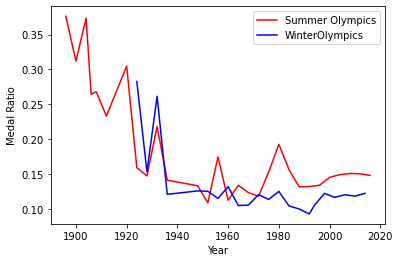

In [8]:
plt.plot(summer_medals.Year, summer_medals.medal_ratio, color = "red", label = "Summer Olympics")
plt.plot(winter_medals.Year, winter_medals.medal_ratio, color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Medal Ratio")
plt.legend()

In the last century, the medal ratio fluctuated greatly in the two competitions, but eventually stabilized. This can be interpreted as establishing norms on these issues.

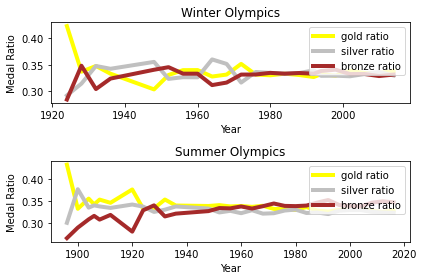

In [9]:
fig, ax = plt.subplots(2)
ax[0].plot(winter_medals.Year, winter_medals.gold_ratio, marker='', color='yellow', linewidth=4, label = "gold ratio")
ax[0].plot(winter_medals.Year, winter_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "silver ratio")
ax[0].plot(winter_medals.Year, winter_medals.bronze_ratio, marker='', color='brown', linewidth=4, label = "bronze ratio")
ax[0].legend(loc=1)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Medal Ratio")
ax[0].set_title("Winter Olympics")
ax[1].plot(summer_medals.Year, summer_medals.gold_ratio, marker='', color='yellow', linewidth=4, label = "gold ratio")
ax[1].plot(summer_medals.Year, summer_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "silver ratio")
ax[1].plot(summer_medals.Year, summer_medals.bronze_ratio, marker='', color='brown', linewidth=4, label = "bronze ratio")
plt.legend(loc=1)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Medal Ratio")
ax[1].set_title("Summer Olympics")
plt.tight_layout()

The relative percentages of gold, silver and bronze medals have also stabilized, which may be due to the reasons mentioned above.

## Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Did you come up with additional ideas for other things to review?

1. I noticed that compared with the Summer Olympics, the age gap between male and female participants in the Winter Olympics is smaller.<br>
2. I found that in the recent Olympics, the percentage of participants who won medals and the ratio of medals (gold:silver:bronze) have stabilized.<br>
3. I realized that there are important differences in the number of participants in the two Olympics (summer and winter), so it must be analyzed separately.<br>

## Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

My first assumption is that the ratio of women to men has increased over time. I will create a year-by-year Female to Male ratio table, and then draw a line graph to see the relationship.

In [10]:
m_f_ratio_summer = pysqldf('''SELECT 
                        Year,
                        CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float)
                          AS Ratio
                     FROM summer_events
                     GROUP BY Year
                    ''')

m_f_ratio_winter = pysqldf('''SELECT 
                        Year,
                        CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float)
                          AS Ratio
                     FROM winter_events
                     GROUP BY Year
                    ''')

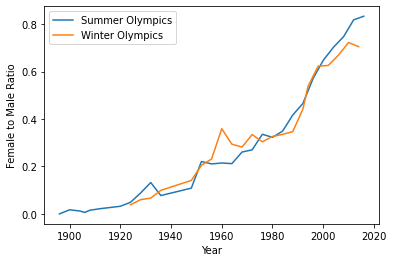

In [11]:
plt.plot(m_f_ratio_summer.Year, m_f_ratio_summer.Ratio,label="Summer Olympics")
plt.plot(m_f_ratio_winter.Year, m_f_ratio_winter.Ratio,label="Winter Olympics")
plt.xlabel("Year")
plt.ylabel("Female to Male Ratio")
plt.legend()

This assumption seems to be correct. Over time, the ratio of men to women has indeed decreased. However, there is an interesting detail: during the Second World War, the proportion of the Summer Olympics dropped sharply, but then it resumed its growth momentum. Without further analysis, I cannot explain this phenomenon.

## Additional questions I am seeking to answer

I will test my next two hypotheses with the help of A/B testing. These assumptions are:<br>
H2: In the Winter Olympics, the annual performance of different countries varies greatly.<br>
H3: A country’s performance in the Winter Olympics is related to its performance in the Summer Olympics.